## Observations and Insights 

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_dataset = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
combined_dataset


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [23]:
# Checking the number of mice.
combined_mice = combined_dataset.groupby('Mouse ID')
count_combined_mice = combined_mice['Mouse ID'].sum().count()
print(f"The number of mice in clean dataset is {count_combined_mice}.")


The number of mice in clean dataset is 249.


In [24]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_dataset[combined_dataset.duplicated(['Mouse ID','Timepoint'])]


In [25]:
# Optional: Get all the data for the duplicate mouse ID. 
print("Duplicate Mice data based on a Mouse ID and Timepoint are:", duplicate_mice, sep='\n')


Duplicate Mice data based on a Mouse ID and Timepoint are:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataset = combined_dataset.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep = 'first')
clean_dataset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [27]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_dataset.groupby('Mouse ID')
count_clean_mice = clean_mice['Mouse ID'].sum().count()
print(f"The number of mice in clean dataset is {count_clean_mice}.")


The number of mice in clean dataset is 249.


## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean_groupby = clean_dataset.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median_groupby = clean_dataset.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
stat_dataset1 = pd.merge(mean_groupby, median_groupby, on = "Drug Regimen", suffixes=("_mean", "_median"))

var_groupby = clean_dataset.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
stat_dataset2 = pd.merge(stat_dataset1, var_groupby, on = "Drug Regimen")

std_groupby = clean_dataset.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
stat_dataset3 = pd.merge(stat_dataset2, std_groupby, on = "Drug Regimen")

sem_groupby = clean_dataset.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
stat_dataset4 = pd.merge(stat_dataset3, sem_groupby, on = "Drug Regimen")

final_statistics = stat_dataset4.rename(columns={"Tumor Volume (mm3)_mean": "Tumor Volume (mm3) - Mean", 
                                                    "Tumor Volume (mm3)_median": "Tumor Volume (mm3) - Median", 
                                                    "Tumor Volume (mm3)_x": "Tumor Volume (mm3) - Variance",
                                                    "Tumor Volume (mm3)_y": "Tumor Volume (mm3) - SDEV", 
                                                    "Tumor Volume (mm3)": "Tumor Volume (mm3) - SEM"})
final_statistics

,Tumor Volume (mm3) - Mean,Tumor Volume (mm3) - Median,Tumor Volume (mm3) - Variance,Tumor Volume (mm3) - SDEV,Tumor Volume (mm3) - SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
final_stats_add = clean_dataset.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
final_stats_add


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

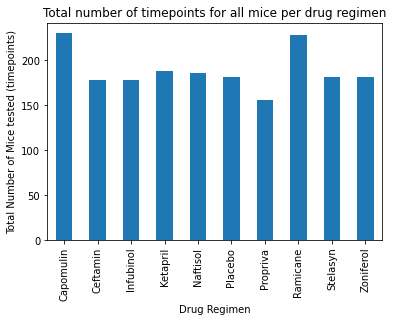

In [30]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_regimen_group = clean_dataset.groupby('Drug Regimen')

timepoint_count = drug_regimen_group['Timepoint'].count()

timepoint_chart = timepoint_count.plot(kind="bar", title="Total number of timepoints for all mice per drug regimen")
timepoint_chart.set_xlabel("Drug Regimen")
timepoint_chart.set_ylabel("Total Number of Mice tested (timepoints)")
#plt.bar(x_axis, count_timepoint["Timepoint"], color='r', alpha=0.5, align="center")
plt.show()


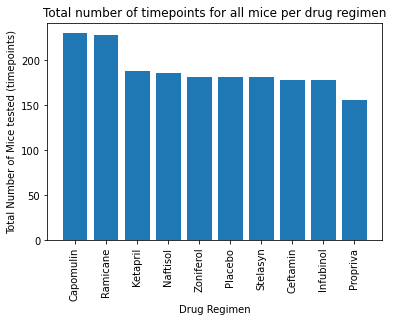

In [31]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

counts = clean_dataset['Drug Regimen'].value_counts()
plt.bar(counts.index.values,counts.values)
plt.title("Total number of timepoints for all mice per drug regimen")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Total Number of Mice tested (timepoints)")
plt.show()


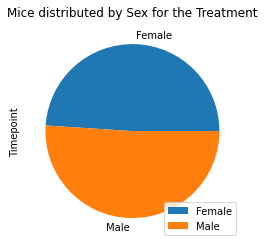

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex_group = clean_dataset.groupby(['Sex'])
sum_up = mice_sex_group.sum()
sum_up.head()

pie_mice_sex = sum_up.plot(kind = "pie", y = 'Timepoint', title = "Mice distributed by Sex for the Treatment")
plt.legend(loc = "lower right")
plt.show()



In [33]:
clean_dataset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


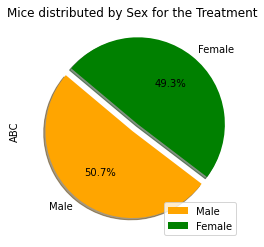

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pyplot_mice = clean_dataset['Sex'].value_counts()
pyplot_mice

labels = pyplot_mice.index
sizes = pyplot_mice.values
colors = ['orange','green']
#fig, ax1 = plt.subplots(figsize = (12,10))



plt.pie(sizes, labels = labels, colors = colors, autopct = "%1.1f%%", startangle = 140, explode = (0, 0.1), shadow = True)
plt.title("Mice distributed by Sex for the Treatment")
plt.legend(loc = "lower right")
plt.ylabel("ABC")
plt.show()

#plt.pie(pyplot_mice([1,2]))
#plt.legend(loc = "best")
#plt.pie(counts.index.values,counts.values)
#plt.title("Total number of timepoints for all mice per drug regimen")
#plt.xlabel("Drug Regimen")
#plt.xticks(rotation=90)
#plt.ylabel("Total Number of Mice tested (timepoints)")
#plt.show()


In [35]:
clean_dataset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

trmt_regimen = clean_dataset.loc[(clean_dataset['Drug Regimen'] == 'Capomulin') | (clean_dataset['Drug Regimen'] == 'Ramicane') | (clean_dataset['Drug Regimen'] == 'Infubinol') | (clean_dataset['Drug Regimen'] == 'Ceftamin')]
#trmt_regimen
# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = clean_dataset.groupby(['Mouse ID']).agg({'Timepoint':['max']})
last_timepoint.columns = last_timepoint.columns.droplevel(0)
final_timepoint = last_timepoint.rename(columns={"max": "Timepoint"})
final_timepoint

final_tumor_vol = pd.merge(trmt_regimen, final_timepoint, on = ['Mouse ID','Timepoint'], how = 'inner')
final_tumor_vol.tail(20)


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
80,q132,Infubinol,Female,1,30,30,54.656549,4
81,q483,Ceftamin,Male,6,26,40,64.192341,1
82,r157,Capomulin,Male,22,25,15,46.539206,0
83,s121,Infubinol,Male,23,26,25,55.650681,2
84,t573,Ceftamin,Female,15,27,0,45.000000,0
85,u149,Ceftamin,Male,24,29,25,52.925348,0
86,u153,Ceftamin,Female,11,25,0,45.000000,0
87,v339,Infubinol,Male,20,26,5,46.250112,0
88,v719,Infubinol,Female,17,30,20,54.048608,1
89,v766,Infubinol,Male,16,27,15,51.542431,1


In [37]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = [0,0,0,0]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

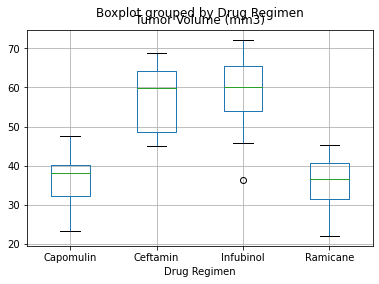

In [38]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


final_tumor_vol.boxplot(column = 'Tumor Volume (mm3)', by = 'Drug Regimen')

plt.show()


## Line and Scatter Plots

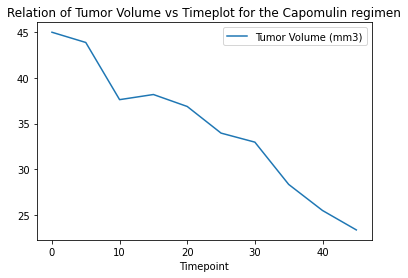

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [83]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_line = clean_dataset.loc[(clean_dataset['Mouse ID'] == 's185')]
capomulin_line.plot(kind = 'line', x = 'Timepoint', y = 'Tumor Volume (mm3)')
plt.title("Relation of Tumor Volume vs Timeplot for the Capomulin regimen")
plt.show()

capomulin_line

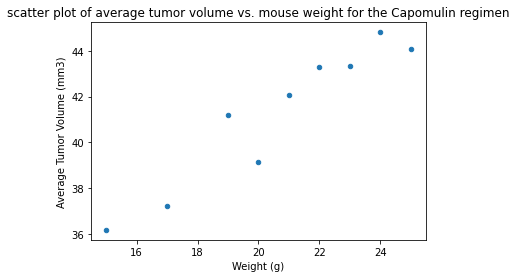

,Weight (g),Average Tumor Volume (mm3)
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700
5,22,43.288490
6,23,43.341051
7,24,44.805810
8,25,44.062109


In [81]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
temp1 = clean_dataset.loc[(clean_dataset['Drug Regimen'] == 'Capomulin')]

temp2 = temp1.groupby(['Weight (g)']).agg({'Tumor Volume (mm3)':['mean']})
temp2.columns = temp2.columns.droplevel(0)
scatter_capomulin = temp2.rename(columns={"mean": "Average Tumor Volume (mm3)"})
scatter_capomulin = scatter_capomulin.reset_index()
scatter_capomulin.columns.values

scatter_capomulin.plot(kind='scatter', x='Weight (g)', y='Average Tumor Volume (mm3)')
plt.title("scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen")
plt.show()

scatter_capomulin

## Correlation and Regression

In [41]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = scatter_capomulin.iloc[:,0]
tumor = scatter_capomulin.iloc[:,1]
correlation = st.pearsonr(tumor,weight)
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.95


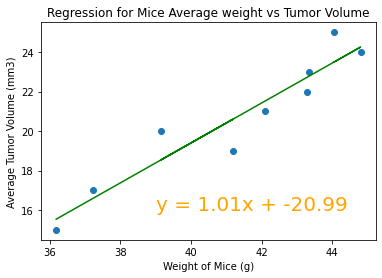

In [80]:
y_values = scatter_capomulin['Weight (g)']
x_values = scatter_capomulin['Average Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"g-")
plt.annotate(line_eq,(39,16), fontsize=20,color="orange")
plt.xlabel('Weight of Mice (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Regression for Mice Average weight vs Tumor Volume")
plt.show()